In [2]:
filtered=sc.read('Capillaries_object.h5ad')

In [ ]:
#filter to top 75
threshold = np.percentile(filtered.obs['total_counts_NFKB_nCLR_H3'], 75)
top10_nfkb = filtered[filtered.obs['total_counts_NFKB_nCLR_H3'] > threshold].copy()

In [13]:
#filter to bottom 10

threshold = np.percentile(filtered.obs['total_counts_NFKB_nCLR_H3'], 10)
bottom10_nfkb = filtered[filtered.obs['total_counts_NFKB_nCLR_H3'] < threshold].copy()

<Axes: xlabel='DiseaseState', ylabel='total_counts_TDP_nCLR_H3'>

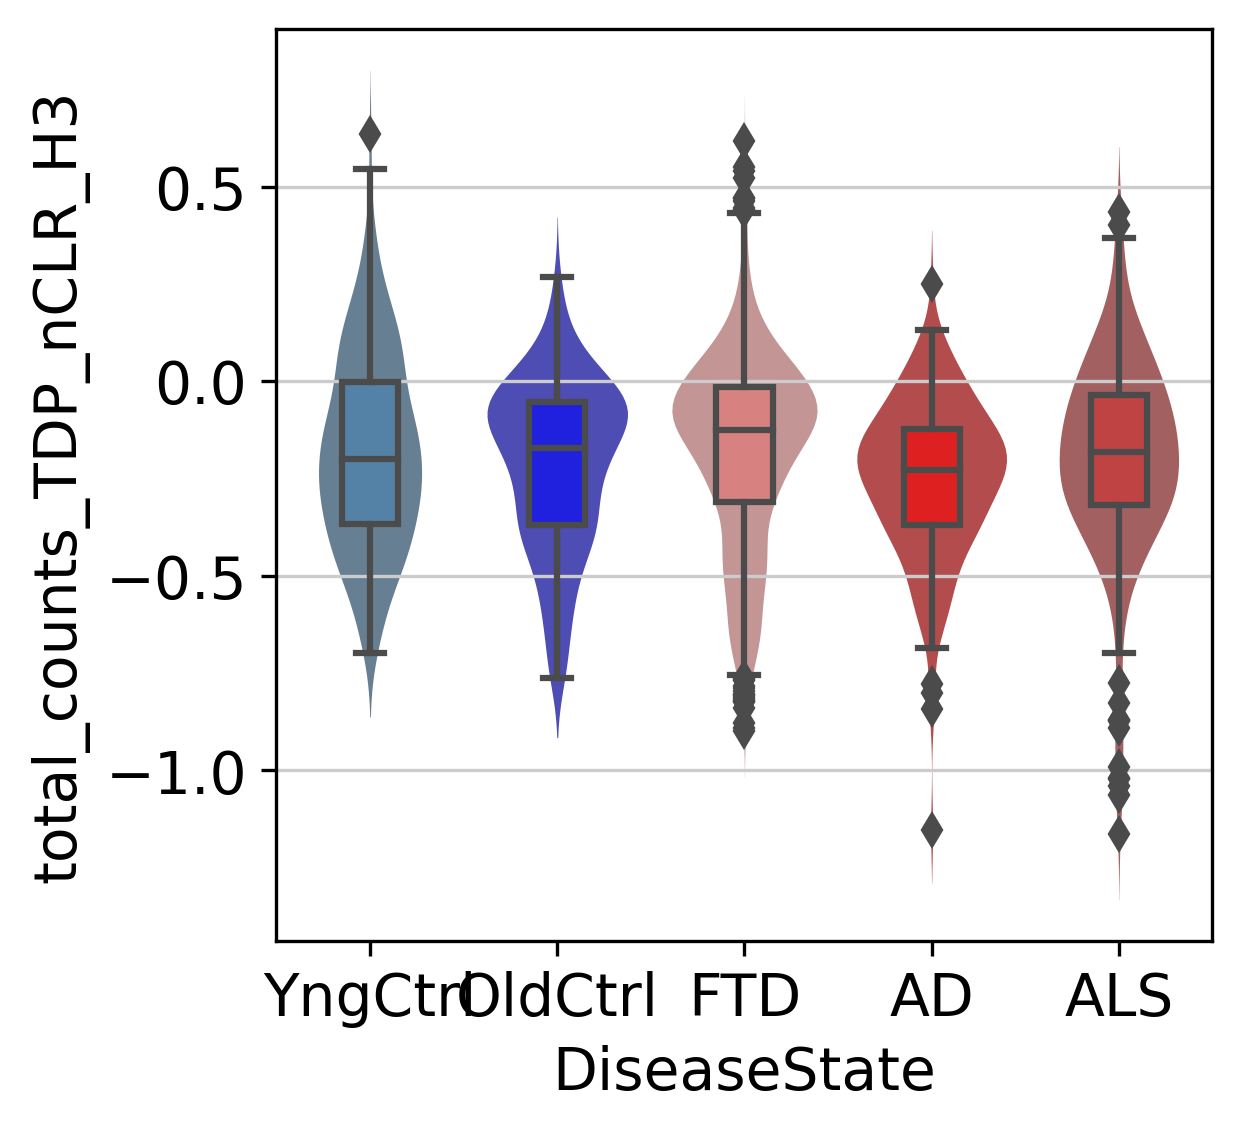

In [16]:
sc.settings.set_figure_params(dpi=150)

ax = sns.violinplot(data=bottom10_nfkb.obs, x='DiseaseState', y='total_counts_TDP_nCLR_H3', palette = ["#4682B4", "#0000FF", "#E57373", '#FF0000', '#D32F2F'],
                    inner=None, linewidth=0, saturation=0.4,order=['YngCtrl','OldCtrl','FTD','AD','ALS'])
sns.boxplot(x='DiseaseState', y='total_counts_TDP_nCLR_H3', data=bottom10_nfkb.obs, palette = ["#4682B4", "#0000FF", "#E57373", '#FF0000', '#D32F2F'], width=0.3,
            boxprops={'zorder': 2}, ax=ax, order=['YngCtrl','OldCtrl','FTD','AD','ALS'])




In [26]:
data = bottom10_nfkb.obs

# ANOVA
anova = ols('total_counts_TDP_nCLR_H3 ~ C(DiseaseState)', data=data).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print(anova_table)

# If ANOVA is significant, proceed with Tukey's HSD
if anova_table['PR(>F)'][0] < 0.05:
    print("\nPerforming Tukey's HSD test...\n")
    tukey = pairwise_tukeyhsd(endog=data['total_counts_TDP_nCLR_H3'],
                              groups=data['DiseaseState'],
                              alpha=0.05)
    print(tukey)

                     sum_sq      df         F    PR(>F)
C(DiseaseState)    1.051434     4.0  4.459926  0.001365
Residual         129.840077  2203.0       NaN       NaN

Performing Tukey's HSD test...

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
     AD     ALS   0.0483 0.1929 -0.0126 0.1091  False
     AD     FTD   0.0706 0.0009  0.0212   0.12   True
     AD OldCtrl    0.035 0.6074 -0.0317 0.1017  False
     AD YngCtrl   0.0668 0.0221  0.0062 0.1273   True
    ALS     FTD   0.0223  0.643 -0.0219 0.0666  False
    ALS OldCtrl  -0.0133 0.9786 -0.0763 0.0497  False
    ALS YngCtrl   0.0185 0.8984 -0.0379 0.0749  False
    FTD OldCtrl  -0.0356 0.3359 -0.0877 0.0165  False
    FTD YngCtrl  -0.0038 0.9993 -0.0476 0.0401  False
OldCtrl YngCtrl   0.0318 0.6381 -0.0309 0.0945  False
-----------------------------------------------------


(-1.2, 2.5)

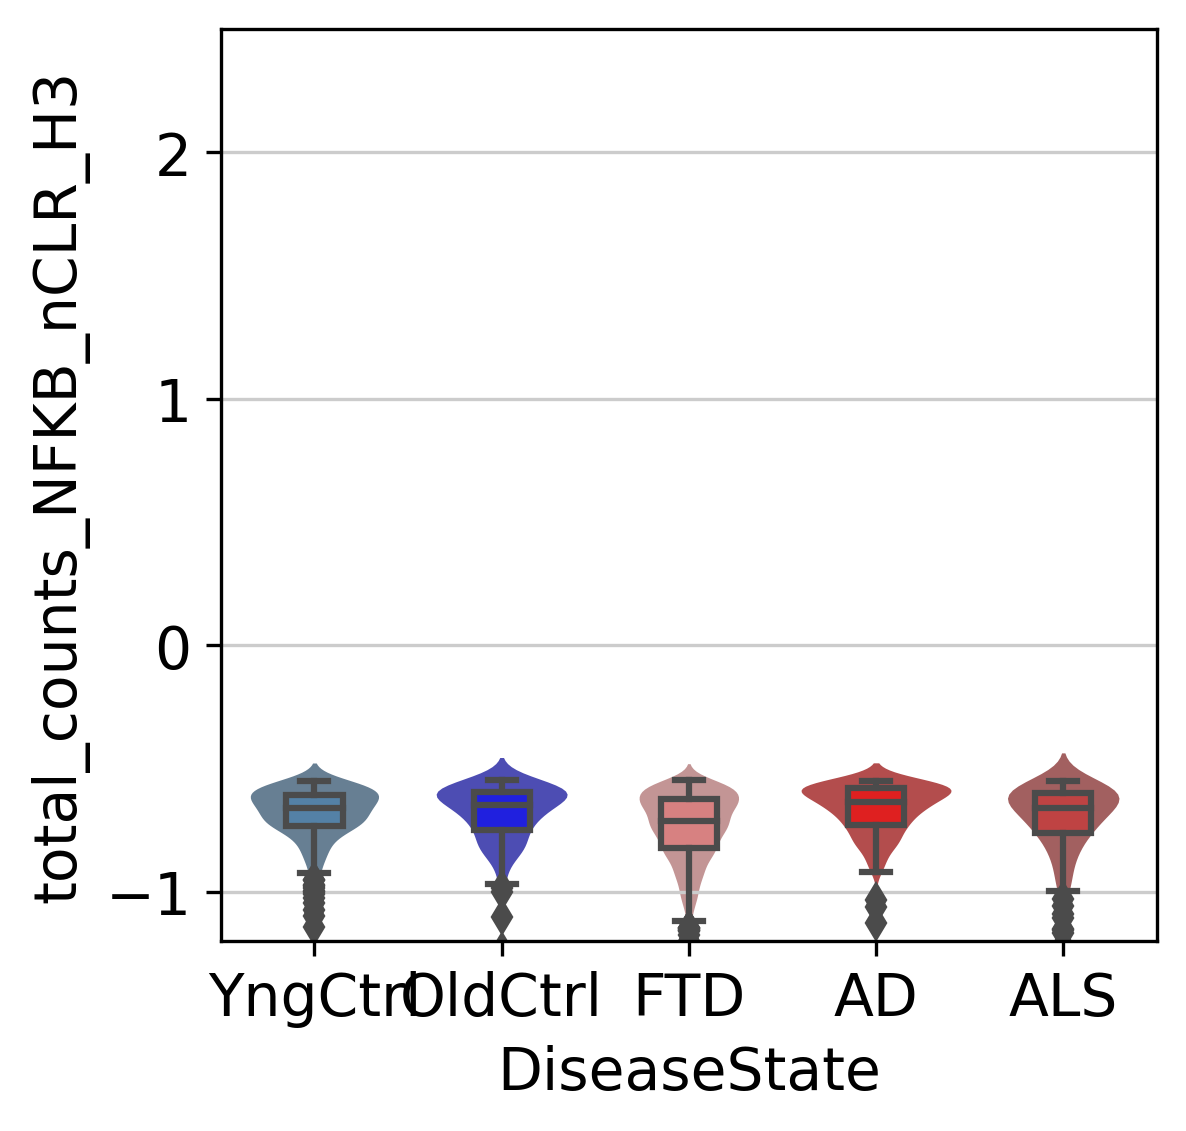

In [23]:
sc.settings.set_figure_params(dpi=150)

ax = sns.violinplot(data=bottom10_nfkb.obs, x='DiseaseState', y='total_counts_NFKB_nCLR_H3', palette = ["#4682B4", "#0000FF", "#E57373", '#FF0000', '#D32F2F'],
                    inner=None, linewidth=0, saturation=0.4,order=['YngCtrl','OldCtrl','FTD','AD','ALS'])
sns.boxplot(x='DiseaseState', y='total_counts_NFKB_nCLR_H3', data=bottom10_nfkb.obs, palette = ["#4682B4", "#0000FF", "#E57373", '#FF0000', '#D32F2F'], width=0.3,
            boxprops={'zorder': 2}, ax=ax, order=['YngCtrl','OldCtrl','FTD','AD','ALS'])

ax.set_ylim([-1.2, 2.5])

<Axes: xlabel='DiseaseState', ylabel='total_counts_TDP_nCLR_H3'>

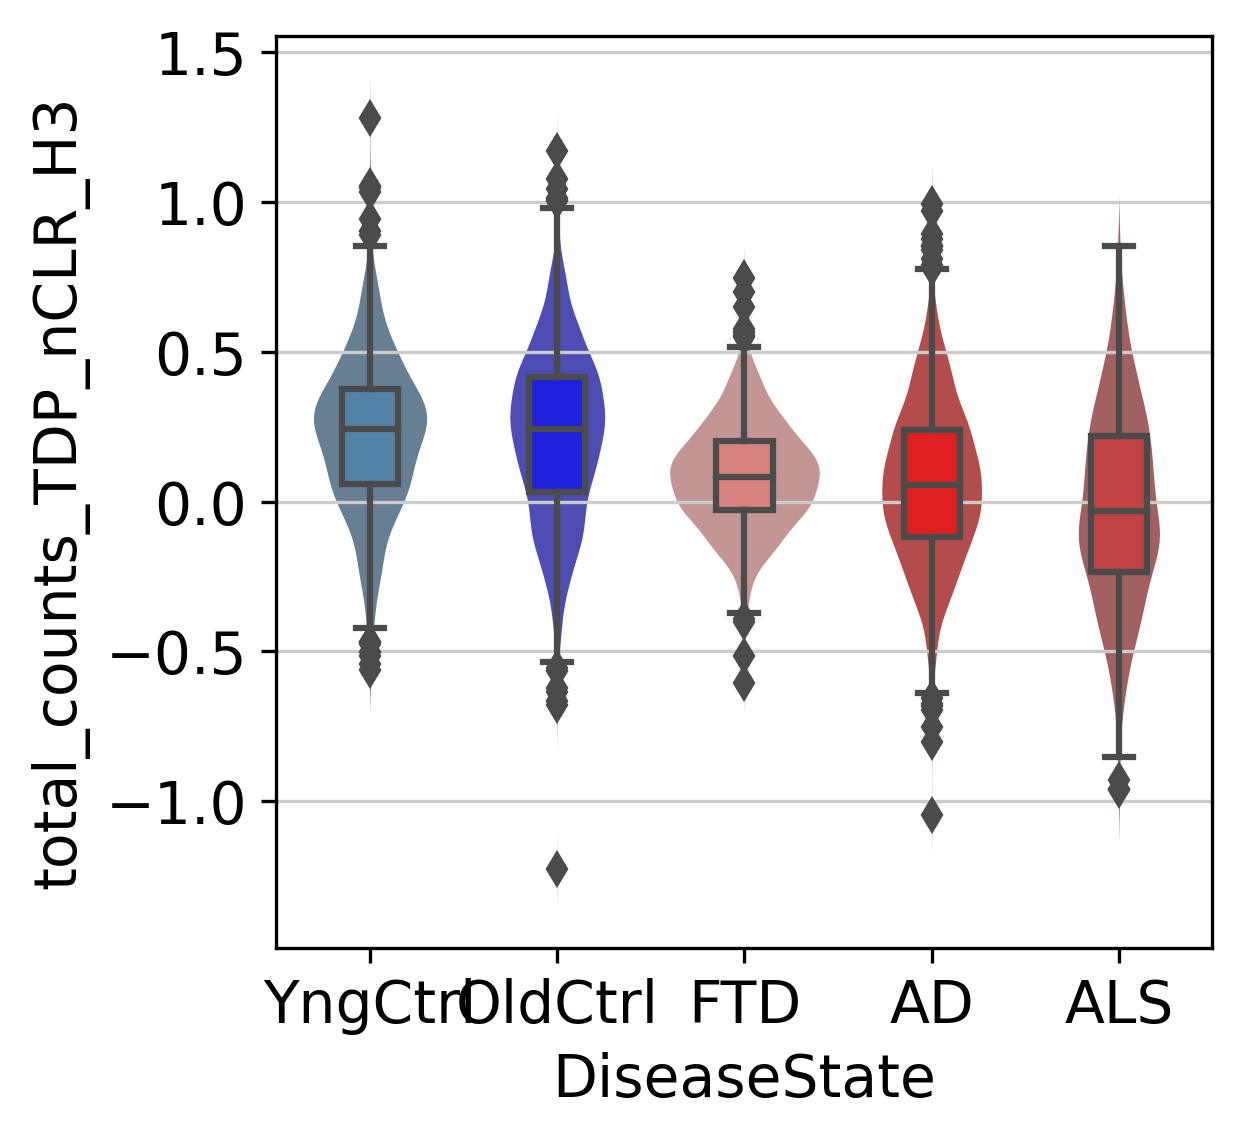

In [22]:
sc.settings.set_figure_params(dpi=150)

ax = sns.violinplot(data=top10_nfkb.obs, x='DiseaseState', y='total_counts_TDP_nCLR_H3', palette = ["#4682B4", "#0000FF", "#E57373", '#FF0000', '#D32F2F'],
                    inner=None, linewidth=0, saturation=0.4,order=['YngCtrl','OldCtrl','FTD','AD','ALS'])
sns.boxplot(x='DiseaseState', y='total_counts_TDP_nCLR_H3', data=top10_nfkb.obs, palette = ["#4682B4", "#0000FF", "#E57373", '#FF0000', '#D32F2F'], width=0.3,
            boxprops={'zorder': 2}, ax=ax, order=['YngCtrl','OldCtrl','FTD','AD','ALS'])


#ax.set_ylim([-1.2, 2.5])

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Assuming top10_nfkb.obs is your DataFrame
data = top10_nfkb.obs

# ANOVA
anova = ols('total_counts_TDP_nCLR_H3 ~ C(DiseaseState)', data=data).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print(anova_table)

# If ANOVA is significant, proceed with Tukey's HSD
if anova_table['PR(>F)'][0] < 0.05:
    print("\nPerforming Tukey's HSD test...\n")
    tukey = pairwise_tukeyhsd(endog=data['total_counts_TDP_nCLR_H3'],
                              groups=data['DiseaseState'],
                              alpha=0.05)
    print(tukey)

                     sum_sq      df           F         PR(>F)
C(DiseaseState)   50.771111     4.0  170.675472  2.329482e-138
Residual         429.474665  5775.0         NaN            NaN

Performing Tukey's HSD test...

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
     AD     ALS  -0.0745   0.0 -0.1054 -0.0435   True
     AD     FTD   0.0265 0.233 -0.0084  0.0615  False
     AD OldCtrl     0.16   0.0  0.1338  0.1862   True
     AD YngCtrl   0.1605   0.0  0.1274  0.1935   True
    ALS     FTD    0.101   0.0  0.0638  0.1382   True
    ALS OldCtrl   0.2345   0.0  0.2054  0.2636   True
    ALS YngCtrl   0.2349   0.0  0.1995  0.2704   True
    FTD OldCtrl   0.1335   0.0  0.1002  0.1668   True
    FTD YngCtrl   0.1339   0.0   0.095  0.1729   True
OldCtrl YngCtrl   0.0005   1.0 -0.0309  0.0318  False
-----------------------------------------------------


(-1.2, 2.5)

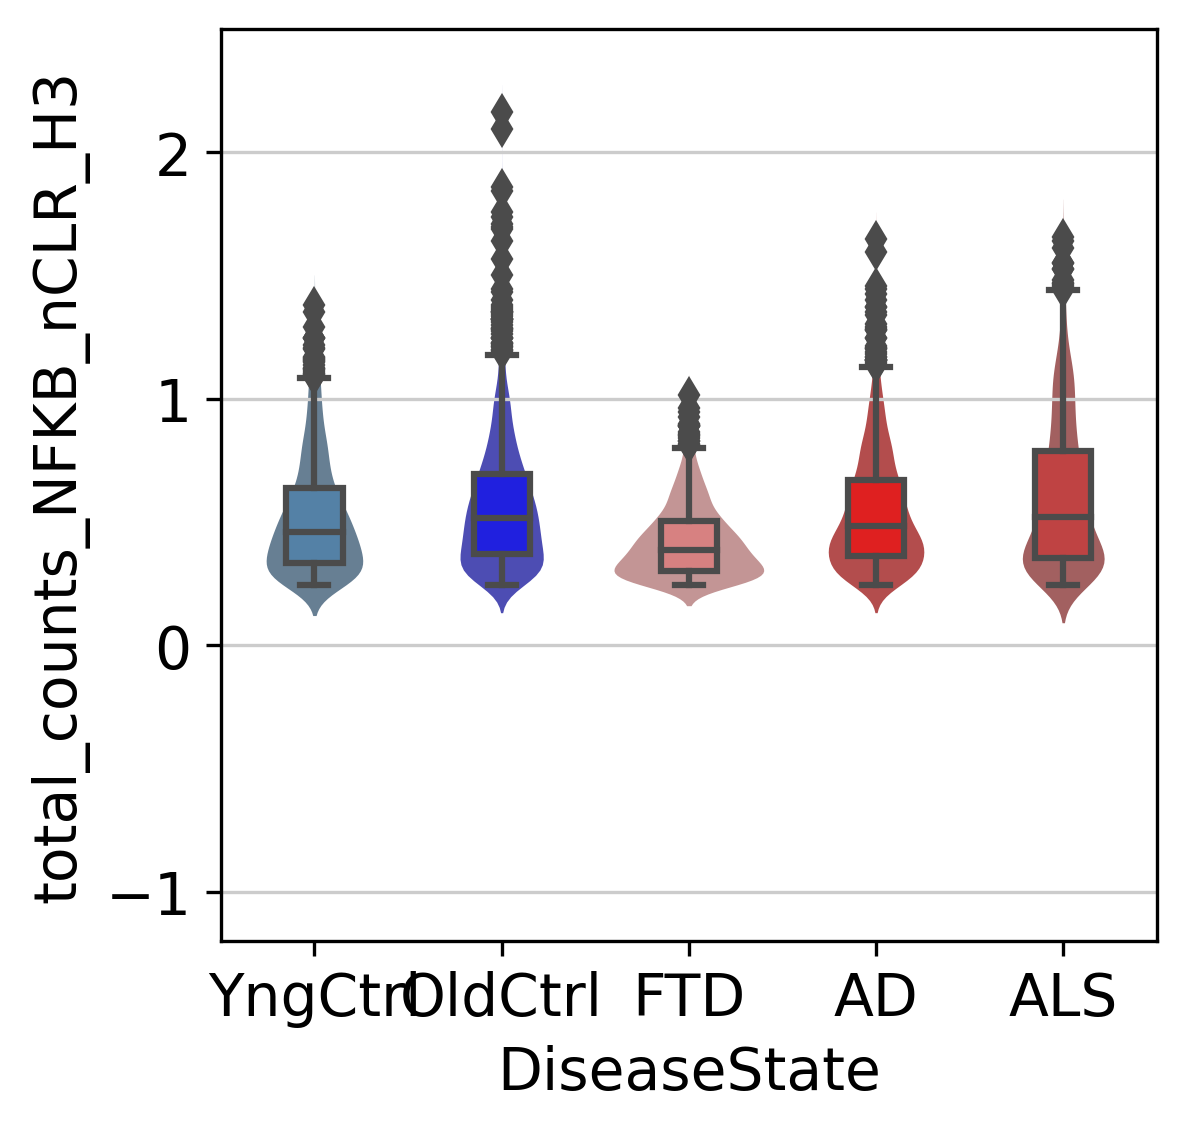

In [20]:
sc.settings.set_figure_params(dpi=150)

ax = sns.violinplot(data=top10_nfkb.obs, x='DiseaseState', y='total_counts_NFKB_nCLR_H3', palette = ["#4682B4", "#0000FF", "#E57373", '#FF0000', '#D32F2F'],
                    inner=None, linewidth=0, saturation=0.4,order=['YngCtrl','OldCtrl','FTD','AD','ALS'])
sns.boxplot(x='DiseaseState', y='total_counts_NFKB_nCLR_H3', data=top10_nfkb.obs, palette = ["#4682B4", "#0000FF", "#E57373", '#FF0000', '#D32F2F'], width=0.3,
            boxprops={'zorder': 2}, ax=ax, order=['YngCtrl','OldCtrl','FTD','AD','ALS'])

ax.set_ylim([-1.2, 2.5])

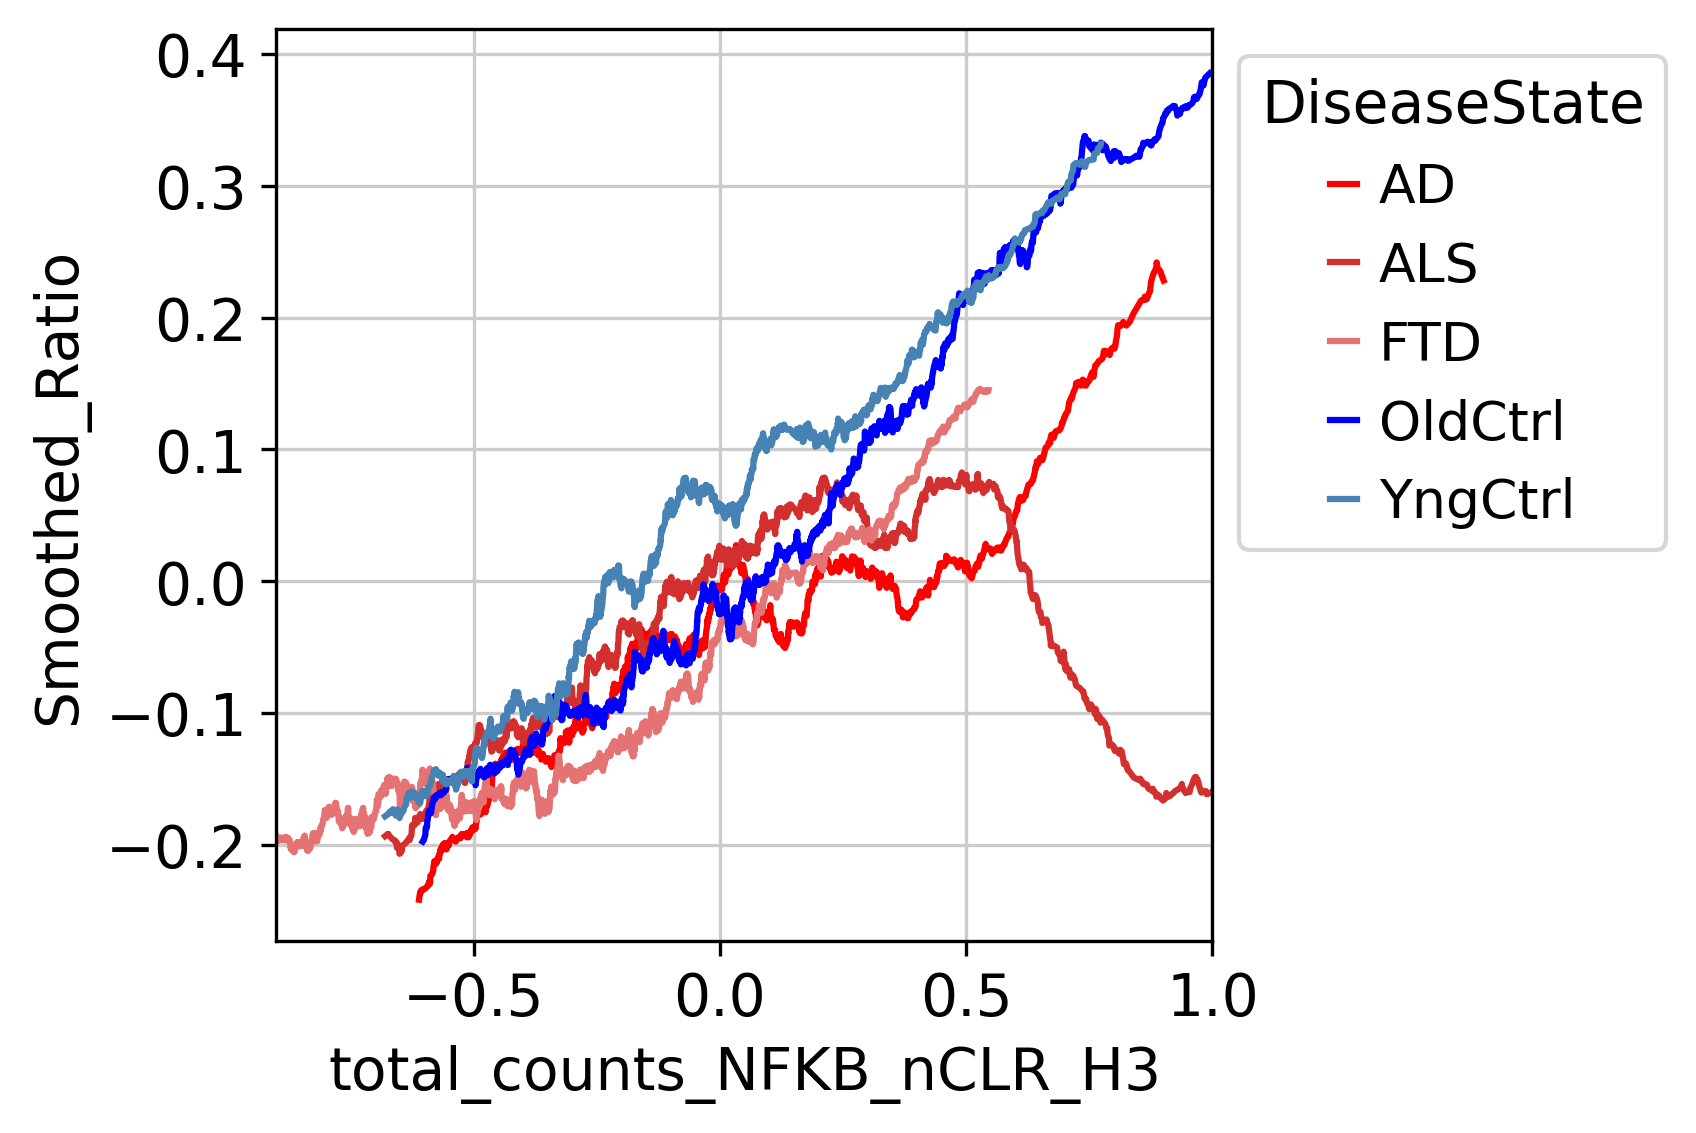

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded your data into top10_nfkb

# Define a rolling window size
window_size = 250

# Sort data for rolling average
filtered.obs = filtered.obs.sort_values(by='total_counts_NFKB_nCLR_H3')

# Apply rolling average
filtered.obs['Smoothed_Ratio'] = filtered.obs.groupby('DiseaseState')['total_counts_TDP_nCLR_H3'].rolling(window=window_size, center=True).mean().reset_index(0, drop=True)

ax = sns.lineplot(data=filtered.obs, x='total_counts_NFKB_nCLR_H3', y='Smoothed_Ratio', hue="DiseaseState", orient="x", palette = ["#FF0000", "#D32F2F", "#E57373", '#0000FF', '#4682B4'])
ax.set_xlim([-0.9, 1])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()